# Cleaning the Data

### Data Source Description: 
For our data, we used the Crime Data from 2020-Present dataset given in Canvas. The original dataset included over 1 million rows of data, but after cleaning and removing rows of values that weren't necessary (null or empty), it was possible to narrow down the dataset to what we want to focus on. In the initial dataset, the key variables included the date that the crime was reported (time and date), the area where the crime was committed, and the classification of the crime. It also included victim characteristics like age, sex, and descent. We chose to focus on the victim's sex, descent, and age. Additionally, we wanted to filter crimes to just show robberies to help solidify our research problem.

In [204]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


crime_df = pd.read_csv("C:/Users/smrit/OneDrive/Desktop/DTSC 3602/Project/Crime_Data_from_2020_to_Present (2).csv")

In [205]:
# Looking at the first few rows
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,0377,31,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,102.0,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,0377,30,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344,47,F,A,101.0,STREET,NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1300 0344 1606 2032,63,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [206]:
# Check for missing values
missing_vals = crime_df.isnull().sum()
missing_vals

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64

In [207]:
# Columns to drop
column_drop = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Weapon Desc', 'Status', 'Premis Desc']

crime_df = crime_df.drop(columns=column_drop, errors='ignore')

crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

Since there are a lot of missing values in columns we dont need, we will drop all of the columns  that will affect the outcome of our data. This includes: **Weapon Desc**, **Crm Cd 2**, **Crm Cd 3**, **Crm Cd 4**, **Status**, **Premis Desc**, and **Cross Street**.  

In [208]:
# Removing duplicate rows
crime_df.duplicated().sum()
crime_df = crime_df.drop_duplicates()

Even though there were no reported duplicate rows, we still included the code to drop duplicates. This ensures that any duplicates that may appear if the dataset is altered in the future will be handled.

In [209]:
# Remove all other crimes except "robbery specific" crimes
crime_df = crime_df[crime_df['Crm Cd Desc'].str.contains('Burglary', case=False, na=False)]
crime_df["Crm Cd Desc"].value_counts()


Crm Cd Desc
BURGLARY FROM VEHICLE               63517
BURGLARY                            57871
BURGLARY, ATTEMPTED                  3951
BURGLARY FROM VEHICLE, ATTEMPTED      707
Name: count, dtype: int64

In terms of crime description, we decided to filter all the rows and only include crimes that are related to **burglary**. Since our research question mainly focuses on burglary, it was important to remove all other unrelated crimes inorder to avoid noise or irrelevant data to the analysis.

In [210]:
# Standardize victim sex
crime_df['Vict Sex'].value_counts()

crime_df['Vict Sex'] = crime_df['Vict Sex'].replace ({
   'M': 'Male', 'F': 'Female', 'X': 'Other', 'H': 'Other', '-': 'Other'
})

# Check data
crime_df['Vict Sex'].value_counts()

Vict Sex
Male      66041
Female    44087
Other     15834
Name: count, dtype: int64

To make things easier for us in the long run, we decided to standardize *victim sex* into 3 categories: **Male**, **Female**, and **Other**. This way, we only have 3 categories instead of 5.

In [211]:
# Standardize victim descent
crime_df['Vict Descent'].value_counts()

crime_df['Vict Descent'] = crime_df['Vict Descent'].replace({
    'H': 'Hispanic/Latino', 'W': 'White', 'B': 'Black',
    'A': 'Asian', 'K': 'Asian', 'C': 'Asian', 'J': 'Asian',
    'X': 'Other', 'O': 'Other', 'F': 'Other', 'V': 'Other',
    'I': 'Other', 'Z': 'Other', 'P': 'Other', 'U': 'Other',
    'D': 'Other', 'L': 'Other', 'G': 'Other', 'S': 'Other',
    '-': 'Other'
})

# Check data
crime_df['Vict Descent'].value_counts()


Vict Descent
White              39509
Other              35243
Hispanic/Latino    28977
Black              14357
Asian               7875
Name: count, dtype: int64

We also decided to standardize *victim descent* to lower the the different categories of race from 20 to 5. These include: **Hispanic/Latino**, **White**, **Black**, **Asian**, and all other races went into a category labeled **Other**. 

In [212]:
# Standardize victim age
crime_df['Vict Age'].value_counts()

# Convert values into numbers and force non-numeric values into 'NaN' values
crime_df["Vict Age"] = pd.to_numeric(crime_df["Vict Age"], errors="coerce")

# Remove invalid ages
crime_df.loc[(crime_df["Vict Age"] < 0) | (crime_df["Vict Age"] > 110), "Vict Age"] = np.nan

# Create age bins and labels
bins = [0, 17, 29, 39, 49, 59, 69, 79, 89, 99, 110]
labels = ['Under 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-110']

# Fix columns with age group
crime_df['Vict Age'] = pd.cut(crime_df['Vict Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Check reordered data
crime_df['Vict Age'].value_counts()

Vict Age
30-39       29872
18-29       25328
Under 18    21458
40-49       19442
50-59       14645
60-69        9338
70-79        4331
80-89        1308
90-99         317
100-110         0
Name: count, dtype: int64

As for age, we decided to order age into categories starting with **under 18** as the yougest and then increasing age by 10 years. This will make it easier for us if we need to categorize age in terms of what age group is most likely to be targeted for burglaries. We also decided to set all invalid ages **<0 or >100** to NaN.

In [213]:
# Drop any rows with null values
crime_df = crime_df.dropna(subset=['AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Mocodes', 'Weapon Used Cd', 'Crm Cd Desc'])
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status Desc,Crm Cd 1,LOCATION,LAT,LON
19,201405023,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,1850,14,Pacific,1435,1,310,BURGLARY,1609 0344,30-39,Male,Asian,501.0,500.0,Invest Cont,310.0,3500 PURDUE AV,34.0158,-118.4258
110,201420929,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,2100,14,Pacific,1473,1,330,BURGLARY FROM VEHICLE,1300 1609 0344,30-39,Female,Hispanic/Latino,101.0,500.0,Invest Cont,330.0,8200 ZITOLA TR,33.9589,-118.4418
113,201418530,10/10/2020 12:00:00 AM,10/10/2020 12:00:00 AM,442,14,Pacific,1474,1,310,BURGLARY,0344 1607,18-29,Male,White,707.0,500.0,Invest Cont,310.0,7900 ALTAVAN AV,33.9663,-118.4212
128,201411615,05/29/2020 12:00:00 AM,05/29/2020 12:00:00 AM,2136,14,Pacific,1432,1,330,BURGLARY FROM VEHICLE,1300 0344,40-49,Female,White,101.0,500.0,Invest Cont,330.0,600 MILWOOD AV,33.9909,-118.4646
185,202112827,08/18/2020 12:00:00 AM,06/16/2020 12:00:00 AM,1200,21,Topanga,2118,1,310,BURGLARY,0344 0352 1606,40-49,Male,Other,507.0,500.0,Adult Other,310.0,20600 W GREEN ASH LN,34.2162,-118.5799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004391,241208344,03/14/2024 12:00:00 AM,03/14/2024 12:00:00 AM,1100,12,77th Street,1203,1,310,BURGLARY,0329 0344,40-49,Female,Hispanic/Latino,501.0,500.0,Invest Cont,310.0,1800 W 46TH ST,34.0019,-118.3113
1004555,240605697,02/03/2024 12:00:00 AM,02/03/2024 12:00:00 AM,130,6,Hollywood,636,1,310,BURGLARY,1822 0329 1607 0344,Under 18,Other,Other,203.0,500.0,Invest Cont,310.0,1800 N CAHUENGA BL,34.1039,-118.3297
1004594,240804146,01/04/2024 12:00:00 AM,01/04/2024 12:00:00 AM,1730,8,West LA,811,1,310,BURGLARY,1607 0321 0344,30-39,Female,White,501.0,500.0,Invest Cont,310.0,16700 BOLLINGER DR,34.0480,-118.5450
1004683,240609958,06/11/2024 12:00:00 AM,06/02/2024 12:00:00 AM,2215,6,Hollywood,629,1,330,BURGLARY FROM VEHICLE,1822 1307 1300 0344 1501,40-49,Male,Hispanic/Latino,501.0,500.0,Invest Cont,330.0,1900 N VAN NESS AV,34.1053,-118.3159


We've also decided to drop any rows with null values so that they don't affect the outcome.

In [214]:
# Double check that no null values exist in current data configuration
missing_vals = crime_df.isnull().sum()
missing_vals

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Weapon Used Cd    0
Status Desc       0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
dtype: int64

Now, we have ensured that there are no more missing values in our dataset, it is ready for us to move forward with our analysis. By handling these missing values, we will be able to avoid any errors, increase accuracy, and reduce any biased results. 

# EDA Results
#### Descriptive Stats:
For our stats, we decided to start off by showing an overview of all of our rows and columns. By cleaning the data, we were able to reduce our dataset from over 1 million to a little over 11,600 rows of data. We also wanted to show some of our variable distribution in percentages in order to get a better understanding of the data. We also incoorperated burglaries by time of day to see if there was a spike in time that was more susceptible to burglaires occuring. Lastly, we wanted to include descriptive stats for all of our numerical data. From this, we are able to see the count (number of non-null values), the mean (avg), the standard deviation, the minimum value, the maximum value, the 25th percentile, the 50th percentile, and the 75th percentile.

In [215]:
# Dataset overview
print("Number of rows (burglary related):", len(crime_df))
print("Number of columns:", crime_df.shape[1])


Number of rows (burglary related): 11622
Number of columns: 21


In [216]:
# Victim age distribution
print(crime_df["Vict Age"].value_counts().sort_index())
print('\nVictim age in percentage')
print((crime_df["Vict Age"].value_counts(normalize=True) * 100).round(2))

Vict Age
Under 18    3091
18-29       1732
30-39       2351
40-49       1623
50-59       1309
60-69        902
70-79        419
80-89        146
90-99         49
100-110        0
Name: count, dtype: int64

Victim age in percentage
Vict Age
Under 18    26.60
30-39       20.23
18-29       14.90
40-49       13.96
50-59       11.26
60-69        7.76
70-79        3.61
80-89        1.26
90-99        0.42
100-110      0.00
Name: proportion, dtype: float64


In [217]:
# Victim sex distribution
print(crime_df["Vict Sex"].value_counts())
print('\nVictim sex in percentage')
print((crime_df["Vict Sex"].value_counts(normalize=True) * 100).round(2))

Vict Sex
Male      5431
Female    3519
Other     2672
Name: count, dtype: int64

Victim sex in percentage
Vict Sex
Male      46.73
Female    30.28
Other     22.99
Name: proportion, dtype: float64


In [218]:
# Victim descent distribution
print(crime_df["Vict Descent"].value_counts())
print('\nVictim descent in percentage')
print((crime_df["Vict Descent"].value_counts(normalize=True) * 100).round(2))

Vict Descent
Other              4369
White              3531
Hispanic/Latino    2040
Black              1110
Asian               572
Name: count, dtype: int64

Victim descent in percentage
Vict Descent
Other              37.59
White              30.38
Hispanic/Latino    17.55
Black               9.55
Asian               4.92
Name: proportion, dtype: float64


In [219]:
# Robberies by division
print(crime_df["AREA NAME"].value_counts())
print('\nRobberies by division in percentage')
print((crime_df["AREA NAME"].value_counts(normalize=True) * 100).round(2))

AREA NAME
Pacific        2042
Hollywood      1732
West LA        1395
Newton          883
Central         879
Devonshire      610
Topanga         537
Rampart         464
Southeast       416
Foothill        386
Northeast       359
West Valley     344
77th Street     308
Van Nuys        294
N Hollywood     243
Wilshire        223
Olympic         185
Southwest       143
Mission          71
Harbor           58
Hollenbeck       50
Name: count, dtype: int64

Robberies by division in percentage
AREA NAME
Pacific        17.57
Hollywood      14.90
West LA        12.00
Newton          7.60
Central         7.56
Devonshire      5.25
Topanga         4.62
Rampart         3.99
Southeast       3.58
Foothill        3.32
Northeast       3.09
West Valley     2.96
77th Street     2.65
Van Nuys        2.53
N Hollywood     2.09
Wilshire        1.92
Olympic         1.59
Southwest       1.23
Mission         0.61
Harbor          0.50
Hollenbeck      0.43
Name: proportion, dtype: float64


In [220]:
# Robberies by time of day
print(crime_df["TIME OCC"].value_counts().sort_index())

TIME OCC
1       178
3         1
4         3
5        31
6         1
       ... 
2353      2
2354      1
2355      8
2358      2
2359      5
Name: count, Length: 935, dtype: int64


In [221]:
# Descriptive stats for numerical columns
crime_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
count,1.162200e+04,11622.000000,11622.000000,11622.000000,11622.0,11622.000000,11622.000000,11622.000000,11622.000000,11622.000000,11622.000000
mean,2.200472e+08,1240.256582,10.638616,1109.908880,1.0,316.849079,339.491137,465.581397,316.849079,34.062098,-118.335269
std,1.326012e+07,720.452987,5.487414,548.831528,0.0,11.311903,203.967159,76.460273,11.311903,0.638250,2.198220
min,2.001005e+08,1.000000,1.000000,101.000000,1.0,310.000000,101.000000,101.000000,310.000000,0.000000,-118.664400
25%,2.106052e+08,520.000000,6.000000,659.000000,1.0,310.000000,120.000000,500.000000,310.000000,34.020100,-118.444500
50%,2.209127e+08,1340.000000,11.000000,1144.000000,1.0,310.000000,244.000000,500.000000,310.000000,34.055300,-118.370600
75%,2.312179e+08,1857.500000,14.000000,1473.000000,1.0,330.000000,501.000000,500.000000,330.000000,34.108400,-118.283300
max,2.506041e+08,2359.000000,21.000000,2197.000000,1.0,410.000000,958.000000,515.000000,410.000000,34.324700,0.000000


### Visualizations

For our visualizations, we decided to include **bar graphs** for *victim sex*, *victim descent*, and *victim age*. We thought these variables would be best displayed as bar charts because they contain categorial values. From these graphs, we are clearly able to see the distribution of victim characteristics across different demographics. For example, the bar chart for *victim sex* shows the difference between male and female victims, while *victim descent* shows how burglaries victims are distributed across different ethnic groups. Lastly, the bar chart for *victim age* shows us which age group is most at risk of burglaries.

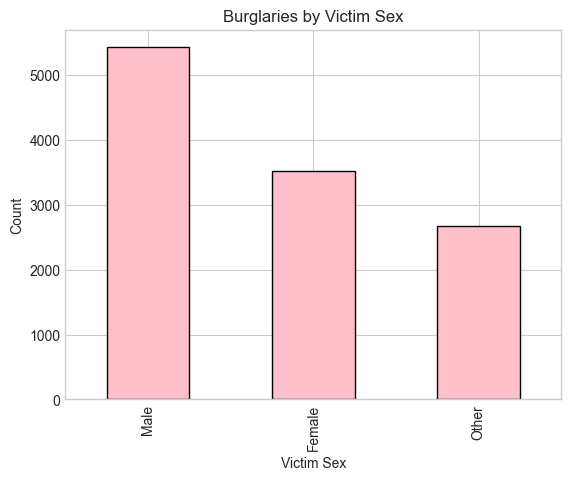

In [222]:
# Distribution of burglaries by victim sex
crime_df['Vict Sex'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Burglaries by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

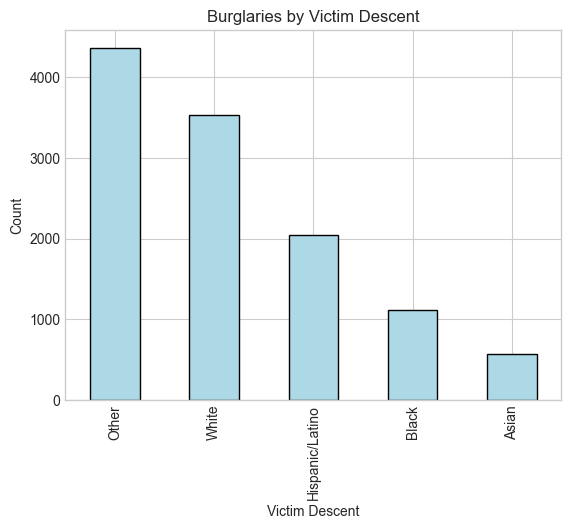

In [223]:
# Distribution of burglaries by victim descent
crime_df['Vict Descent'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Burglaries by Victim Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.show()

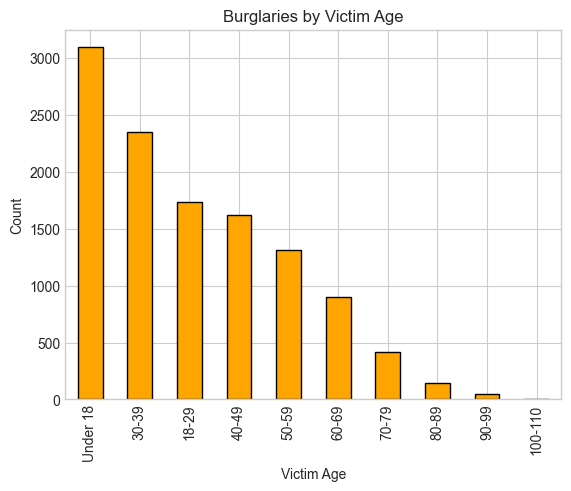

In [224]:
# Distribution of burglaries by victim age
crime_df['Vict Age'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Burglaries by Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()

We also decided to include a **scatterplot** of latitude and longitude values in order to help up identify if there was a pattern in crime location. From the scatterplot, we were able to identify that there are large clusters of crime in certain divisions/neighborhoods. This shows that burglaries are not every distributed across the whole city but rather, there are certain "hotspots" for robberies.

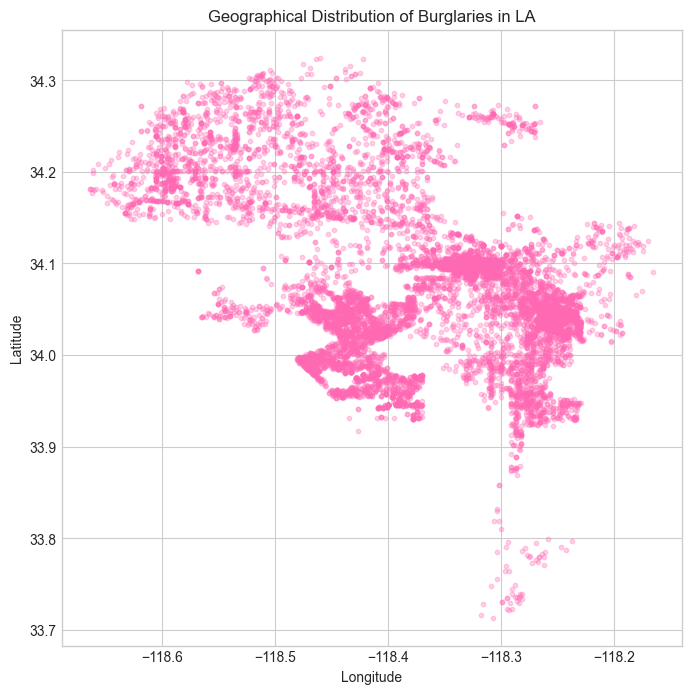

In [225]:
# Scatterplot of robbery locations
crime_df = crime_df[(crime_df['LAT'].between(33,35)) & (crime_df['LON'].between(-119,-117))]

plt.figure(figsize=(8,8))
plt.scatter(crime_df['LON'], crime_df['LAT'], alpha=0.3, s=10, color='hotpink')
plt.title('Geographical Distribution of Burglaries in LA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

To better understand when burglaries occur, we made a **line graph** of incidents across the 24-hour day. The x-axis represent the time of day (from 0 to 23, in 24-hour format) and the y-axis shows the number of burglaries reported. This shows us that burglaries are high during night hours and low during early morning hours. From this, we can infer that burglaries are more likely to occur when there's a higher public presence.  

C:\Users\smrit\AppData\Local\Temp\ipykernel_32344\3208945340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df.loc[:, 'HOUR_OCC'] = crime_df['TIME OCC'] // 100


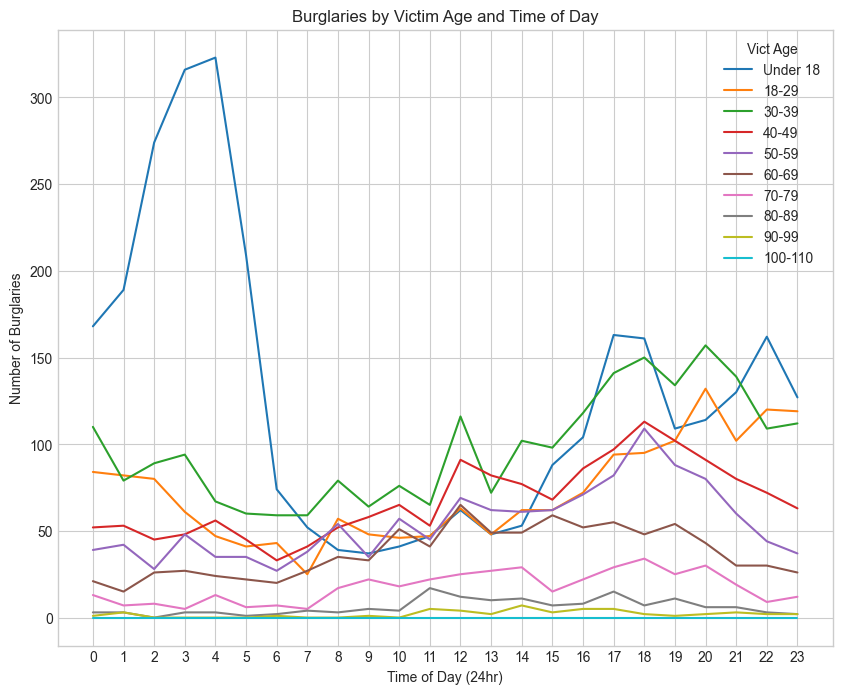

In [226]:
crime_df.loc[:, 'HOUR_OCC'] = crime_df['TIME OCC'] // 100
age_time = crime_df.groupby(['Vict Age','HOUR_OCC'], observed=False).size().reset_index(name='Count')


plt.figure(figsize=(10,8))
sns.lineplot(data=age_time, x='HOUR_OCC', y='Count', hue='Vict Age')
plt.title('Burglaries by Victim Age and Time of Day')
plt.xlabel('Time of Day (24hr)')
plt.ylabel('Number of Burglaries')
plt.xticks(range(0, 24))
plt.show()

Lastly, we also decided to add a correlation heatmap to show the relationships between all of the numerical variables. From this heatmap, we can see that most of the features have very weak correlations meaning that they are largely independent from each other. Overall, the heatmap suggests that because each variable is independent, it can help us identify unique information without too much repetition across our different variables.  

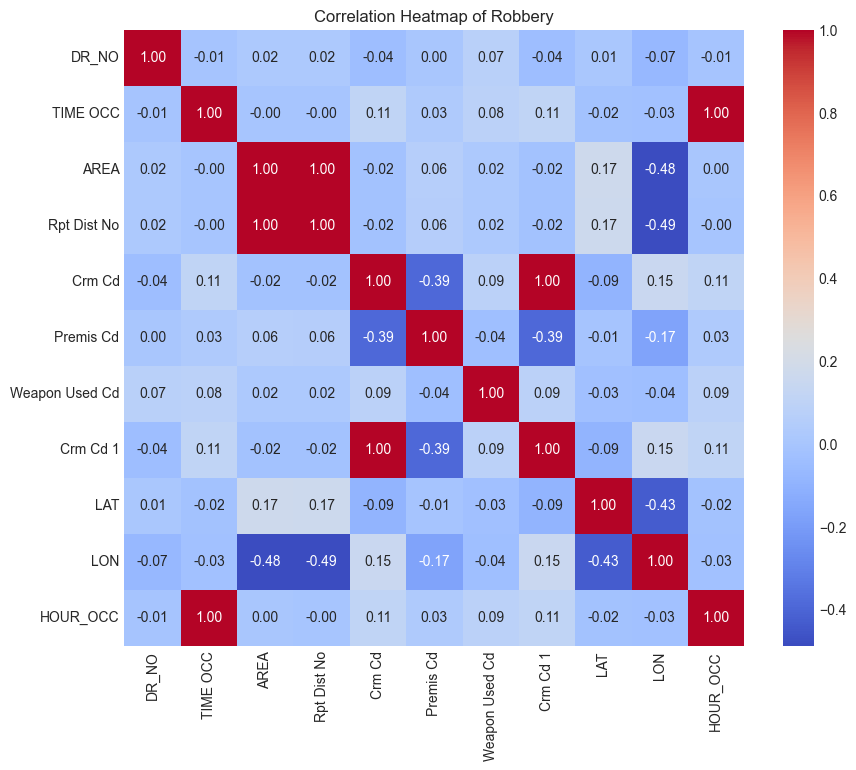

In [227]:
# Correlation heatmap of all variables
numeric_df = crime_df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(columns=['Part 1-2'], errors='ignore')
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Robbery')
plt.show()

### Discussion of limitations and data bias:
The dataset we are using is helpful for studying crime, but it has some issues. Firstly, not every crime is reported, and reporting can differ by neighborhood or demographic, so the data may not reflect all communities fairly. Next, some values were missing, and by removing them during cleaning, it could have left out certain patterns. We also chose to only focus on burglaries, which narrowed our scope and left out other crime trends. Similarly, the “descent” variable is based on police codes, which might not fully match how people identify in terms of race. Since the data only covers 2020 to the present, it leaves out long-term trends and is shaped strongly by the pandemic years. Finally, how crimes are recorded or classified can differ between officers or districts, which can add more bias.

# Majority Baseline Model

We decided to include a majority baseline to show us what the minimum accuracy we could get is. 

In [228]:
# Select columns of interest
crime_df_baseline = crime_df[['AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent','Crm Cd', 'Crm Cd Desc']]

crime_df_baseline.shape

(11618, 6)

Metadata for the columns of interest:
- (integer) AREA NAME: The location of where the burglary occured
- (integer) Vict Age: The age of the victims
- (integer) Vict Sex: The sex of victims
- (factor) Vict Descent: The race of victims
- (factor) Crm Cd: Crime code description. 310 = burglary and 330 = burglary from vehicle
- (factor) Crm Cd Desc: Type of burglary

In [229]:
# Summary statistics of columns of interest
columns = crime_df_baseline.columns
for col in columns:
    print('****',col,'****')
    print(crime_df_baseline[col].describe())

**** AREA NAME ****
count       11618
unique         21
top       Pacific
freq         2039
Name: AREA NAME, dtype: object
**** Vict Age ****
count        11618
unique           9
top       Under 18
freq          3090
Name: Vict Age, dtype: object
**** Vict Sex ****
count     11618
unique        3
top        Male
freq       5430
Name: Vict Sex, dtype: object
**** Vict Descent ****
count     11618
unique        5
top       Other
freq       4368
Name: Vict Descent, dtype: object
**** Crm Cd ****
count    11618.000000
mean       316.849716
std         11.312657
min        310.000000
25%        310.000000
50%        310.000000
75%        330.000000
max        410.000000
Name: Crm Cd, dtype: float64
**** Crm Cd Desc ****
count        11618
unique           4
top       BURGLARY
freq          7608
Name: Crm Cd Desc, dtype: object


In [230]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [231]:
# Split the data into 75% for training and 25% for testing, set random_state to an integer number for reproducibility
crime_train1, crime_test1 = train_test_split(crime_df, test_size =0.25, random_state = 7)

# Check size of partitions
print(crime_test1.shape)
print(crime_train1.shape)

(2905, 22)
(8713, 22)


In [232]:
# Balance the dataset
print(crime_train1['Vict Descent'].count())
crime_train1['Vict Descent'].value_counts()

8713


Vict Descent
Other              3284
White              2653
Hispanic/Latino    1513
Black               817
Asian               446
Name: count, dtype: int64

To increase the representation of 'Black' and 'Asian' to 30%, we will use the formula: 
    x = (p(records) - rare) / (1 - p)

Plug in the numbers from our training set we would get:
- For 'Black': 
    x = (0.3(8713) - 817) / (1 - 0.3)
    x = 2567
- For 'Asian':
x = (0.3(8713) - 446) / (1 - 0.3)
x = 3097

Using these numbers we can resample our training set.

In [233]:
# Find all the records that match the criteria for the resampling and perform resampling
to_resample_black = crime_train1.loc[crime_train1['Vict Descent'] =="Black"] 
our_resample_black = to_resample_black.sample(n = 2567 , replace = True)

to_resample_asian = crime_train1.loc[crime_train1['Vict Descent'] =="Asian"]
our_resample_asian = to_resample_asian.sample(n = 3097 , replace = True)

In [234]:
# Add the resampled data to the training set
crime_train_rebal = pd.concat([crime_train1, our_resample_black, our_resample_asian])
print("Rebalanced training set distribution:")
print(crime_train_rebal['Vict Descent'].value_counts())
crime_train_rebal.info()

Rebalanced training set distribution:
Vict Descent
Asian              3543
Black              3384
Other              3284
White              2653
Hispanic/Latino    1513
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14377 entries, 434653 to 81948
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   DR_NO           14377 non-null  int64   
 1   Date Rptd       14377 non-null  object  
 2   DATE OCC        14377 non-null  object  
 3   TIME OCC        14377 non-null  int64   
 4   AREA            14377 non-null  int64   
 5   AREA NAME       14377 non-null  object  
 6   Rpt Dist No     14377 non-null  int64   
 7   Part 1-2        14377 non-null  int64   
 8   Crm Cd          14377 non-null  int64   
 9   Crm Cd Desc     14377 non-null  object  
 10  Mocodes         14377 non-null  object  
 11  Vict Age        14377 non-null  category
 12  Vict Sex        14377 non-null  object  
 13 

In [235]:
# Import libraries
from sklearn.metrics import accuracy_score

# Target = burglary type (from descriptions)
y = crime_df_baseline['Crm Cd Desc']

# Majority class = the most frequent burglary description
majority_class = y.value_counts().idxmax()
print("Majority class:", majority_class)

# Predict majority class for all rows
y_test = crime_test1['Crm Cd Desc']
y_majority_pred = [majority_class] * len(y_test)

# Accuracy of the majority-class baseline
majority_acc = accuracy_score(y_test, y_majority_pred)
print("Majority Class Baseline Accuracy:", majority_acc)


Majority class: BURGLARY
Majority Class Baseline Accuracy: 0.6540447504302926


# Logistic Regression Baseline Model

In [236]:
# Turning age groups into numeric values
age_mapping = {
    "Under 18": 9,
    "18-29": 23.5,
    "30-39": 34.5,
    "40-49": 44.5,
    "50-59": 54.5,
    "60-69": 64.5,
    "70-79": 74.5,
    "80-89": 84.5,
    "90-99": 94.5,
    "100-110": 105
}
crime_train_rebal.loc[:, "Vict Age"] = crime_train_rebal["Vict Age"].map(age_mapping)
crime_train_rebal["Vict Age"] = crime_train_rebal["Vict Age"].astype(float)

C:\Users\smrit\AppData\Local\Temp\ipykernel_32344\4176012586.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[23.5, 9.0, 34.5, 23.5, 23.5, ..., 54.5, 34.5, 34.5, 54.5, 74.5]
Length: 14377
Categories (10, float64): [9.0 < 23.5 < 34.5 < 44.5 ... 74.5 < 84.5 < 94.5 < 105.0]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  crime_train_rebal.loc[:, "Vict Age"] = crime_train_rebal["Vict Age"].map(age_mapping)


In [237]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features (X): demographics + neighborhood
X_train = crime_train_rebal[['Vict Age', 'Vict Sex', 'Vict Descent', 'AREA NAME']]
X_test = crime_test1[['Vict Age', 'Vict Sex', 'Vict Descent', 'AREA NAME']]


# One-hot encode categorical predictors
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns (in case train/test differ after encoding)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Target (y): burglary type
y_train = crime_train_rebal['Crm Cd Desc']
y_test = crime_test1['Crm Cd Desc']

# Logistic regression (multiclass because you have multiple burglary subtypes)
log_reg = LogisticRegression(max_iter=1000, solver='saga')
log_reg.fit(X_train, y_train)


# Predictions
y_pred = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

print("\nLogistic Regression Baseline Results:")
print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Baseline Results:
                                  precision    recall  f1-score   support

                        BURGLARY       0.84      0.60      0.70      1900
           BURGLARY FROM VEHICLE       0.46      0.83      0.59       856
BURGLARY FROM VEHICLE, ATTEMPTED       0.00      0.00      0.00        20
             BURGLARY, ATTEMPTED       0.00      0.00      0.00       129

                        accuracy                           0.64      2905
                       macro avg       0.32      0.36      0.32      2905
                    weighted avg       0.68      0.64      0.63      2905



C:\Users\smrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [238]:
# Model comparison
print(f"Model Comparison:")
print(f"Majority Class Baseline Accuracy: {majority_acc:.3f}")
print(f"Logistic Regression Accuracy: {log_acc:.3f}")

Model Comparison:
Majority Class Baseline Accuracy: 0.654
Logistic Regression Accuracy: 0.636


# Model Construction

In [239]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [240]:
print(crime_train_rebal['Vict Age'])

434653    23.5
846607     9.0
403385    34.5
889745    23.5
460222    23.5
          ... 
375103    54.5
848727    34.5
197184    34.5
458379    54.5
81948     74.5
Name: Vict Age, Length: 14377, dtype: float64


In [241]:
unmapped = crime_train_rebal.loc[crime_train_rebal["Vict Age"].isna(), "Vict Age"]
print(unmapped.unique())
print(crime_train_rebal["Vict Age"].value_counts())

X_train.info()
# print(X_train['Vict Age'].unique()[:20])
print(X_train['Vict Age'].dtype)
print(crime_train_rebal["Vict Age"].value_counts())

[]
Vict Age
34.5    3388
23.5    2522
9.0     2325
44.5    2288
54.5    1729
64.5    1276
74.5     587
84.5     177
94.5      85
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14377 entries, 434653 to 81948
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Vict Age                      14377 non-null  float64
 1   Vict Sex_Male                 14377 non-null  bool   
 2   Vict Sex_Other                14377 non-null  bool   
 3   Vict Descent_Black            14377 non-null  bool   
 4   Vict Descent_Hispanic/Latino  14377 non-null  bool   
 5   Vict Descent_Other            14377 non-null  bool   
 6   Vict Descent_White            14377 non-null  bool   
 7   AREA NAME_Central             14377 non-null  bool   
 8   AREA NAME_Devonshire          14377 non-null  bool   
 9   AREA NAME_Foothill            14377 non-null  bool   
 10  AREA NAME_Harbor       

In [242]:
# Split data into training and testing sets
crime_df_model = crime_train_rebal[['AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd Desc']]

target = 'Crm Cd Desc'

numeric_features = ['Vict Age']
categorical_features = ['Vict Sex', 'Vict Descent', 'AREA NAME']

X = crime_df_model[['AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent']]
y = crime_df_model['Crm Cd Desc'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [243]:
# Preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [244]:
# Define models and pipelines
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=20000, solver="saga"))
])

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

gb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [245]:
# Hyperparameter grids for tuning

# Logistic Regression
log_reg_param_grid = {
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__class_weight": [None, "balanced"],
    "classifier__solver": ["saga"], 
}

# Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 10, 50],
    'classifier__class_weight': [None, 'balanced'],
}

# Gradient Boosting
gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_leaf': [1, 10, 50],
}

In [246]:
# Setting up GridSearchCV for Logistic Regression
log_reg_gs = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=0               
)
log_reg_gs.fit(X_train, y_train)


,estimator,Pipeline(step...ver='saga'))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__class_weight': [None, 'balanced'], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['saga']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [247]:
# Setting up GridSearchCV for Random Forest
rf_gs = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=0               
)
rf_gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__class_weight': [None, 'balanced'], 'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_leaf': [1, 10, ...], 'classifier__min_samples_split': [2, 5], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [248]:
# Setting up GridSearchCV for Gradient Boosting
gb_gs = GridSearchCV(
    estimator=gb_clf,
    param_grid=gb_param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=0               
)
gb_gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__learning_rate': [0.05, 0.1], 'classifier__max_depth': [3, 5], 'classifier__min_samples_leaf': [1, 10, ...], 'classifier__n_estimators': [100, 200]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [249]:
# Inspect best parameters and scores
print("Logistic Regression Best Params:", log_reg_gs.best_params_)
print("Logistic Regression Best F1 Score:", log_reg_gs.best_score_)

print("Random Forest Best Params:", rf_gs.best_params_)
print("Random Forest Best F1 Score:", rf_gs.best_score_)

print("Gradient Boosting Best Params:", gb_gs.best_params_)
print("Gradient Boosting Best F1 Score:", gb_gs.best_score_)

Logistic Regression Best Params: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Logistic Regression Best F1 Score: 0.32661195509801483
Random Forest Best Params: {'classifier__class_weight': None, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Random Forest Best F1 Score: 0.4412932523035131
Gradient Boosting Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 200}
Gradient Boosting Best F1 Score: 0.4378608875896739


Test F1-macro: 0.45516750543689144
Classification Report:
                                   precision    recall  f1-score   support

                        BURGLARY       0.77      0.82      0.79      2235
           BURGLARY FROM VEHICLE       0.62      0.62      0.62      1172
BURGLARY FROM VEHICLE, ATTEMPTED       0.67      0.11      0.19        18
             BURGLARY, ATTEMPTED       0.65      0.13      0.22       170

                        accuracy                           0.72      3595
                       macro avg       0.68      0.42      0.46      3595
                    weighted avg       0.71      0.72      0.71      3595

Confusion Matrix:
 [[1835  390    1    9]
 [ 443  727    0    2]
 [   7    8    2    1]
 [ 101   47    0   22]]


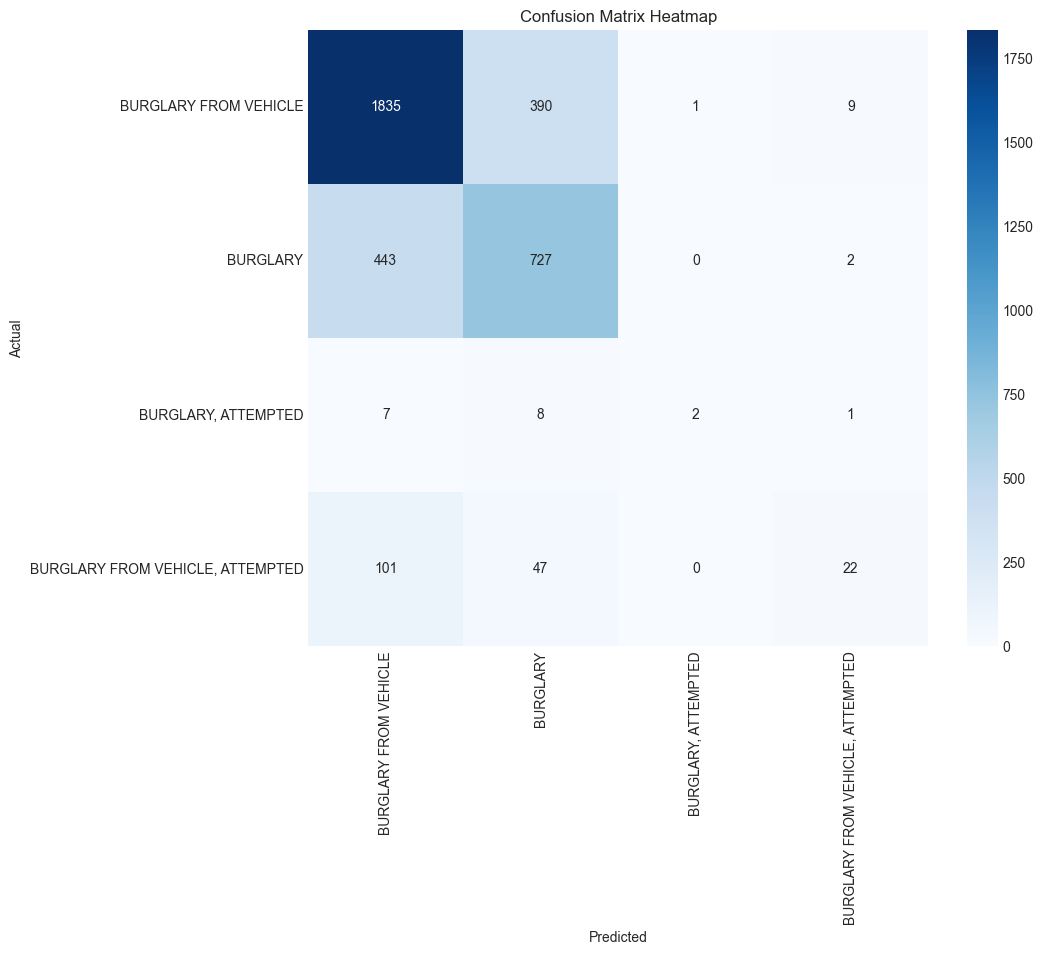

In [250]:
# Pick the best model (for example Random Forest)
best_model = rf_gs.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Metrics
print("Test F1-macro:", f1_score(y_test, y_pred, average="macro"))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
labels_order = y_test.unique()

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels_order, yticklabels=labels_order)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [251]:
# Results for each model
results = []

for name, gs in [("Logistic Regression", log_reg_gs),
                 ("Random Forest", rf_gs),
                 ("Gradient Boosting", gb_gs)]:

    # Best estimator on the test set
    y_pred = gs.best_estimator_.predict(X_test)
    
    results.append({
        "model": name,
        "cv_f1": gs.best_score_,
        "test_accuracy": accuracy_score(y_test, y_pred),
        "test_f1_macro": f1_score(y_test, y_pred, average="macro"),
        "estimator": gs.best_estimator_,
        "best_params": gs.best_params_
    })

# Build the summary DataFrame
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ("estimator", "best_params")}
    for r in results
]).sort_values(by="test_f1_macro", ascending=False).reset_index(drop=True)

results_df


,model,cv_f1,test_accuracy,test_f1_macro
0,Gradient Boosting,0.437861,0.725174,0.461999
1,Random Forest,0.441293,0.719332,0.455168
2,Logistic Regression,0.326612,0.685396,0.323644


# Representation Scenarios and Modeling Comparisons

In [269]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv("C:/Users/smrit/OneDrive/Desktop/DTSC 3602/Project/Datasets/Crime_Data_from_2020_to_Present (2).csv", low_memory=False)
cols = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Age', 'LAT', 'LON']
df = df[cols].dropna()
df = df[df['Vict Sex'].isin(['M', 'F'])]
df = df.sample(10000, random_state=42)

y = df['Vict Sex']

In [270]:
# Baseline Representation
X_base = df.drop(columns=['Vict Sex'])
X_base = X_base.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)
X_train_b, X_test_b, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

In [271]:
# Improved Representation
X_imp = df.copy()
bins = [0, 18, 30, 50, 70, 120]
labels = ['Under18', '18-30', '30-50', '50-70', '70+']
X_imp['AgeGroup'] = pd.cut(X_imp['Vict Age'], bins=bins, labels=labels, right=False)
X_imp = X_imp.drop(columns=['Vict Age'])
X_imp = pd.get_dummies(X_imp, drop_first=True)
scaler = StandardScaler()
num_cols = X_imp.select_dtypes(include=['float64', 'int64']).columns
X_imp[num_cols] = scaler.fit_transform(X_imp[num_cols])
X_train_i, X_test_i, _, _ = train_test_split(X_imp, y, test_size=0.3, random_state=42)

In [272]:
def evaluate_models(X_train, X_test, y_train, y_test, label):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=500),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
    }
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, pos_label='M')
        rec = recall_score(y_test, y_pred, pos_label='M')
        f1 = f1_score(y_test, y_pred, pos_label='M')
        male_acc = accuracy_score(y_test[y_test=='M'], y_pred[y_test=='M'])
        female_acc = accuracy_score(y_test[y_test=='F'], y_pred[y_test=='F'])
        fairness_gap = abs(male_acc - female_acc)
        results.append({
            'Scenario': label, 'Model': name,
            'Accuracy': round(acc,3), 'Precision': round(prec,3),
            'Recall': round(rec,3), 'F1': round(f1,3),
            'Fairness_Gap': round(fairness_gap,3)
        })
    return pd.DataFrame(results)
baseline_results = evaluate_models(X_train_b, X_test_b, y_train, y_test, 'Baseline')
improved_results = evaluate_models(X_train_i, X_test_i, y_train, y_test, 'Improved')
results = pd.concat([baseline_results, improved_results])
print(results)

   Scenario                Model  Accuracy  Precision  Recall     F1  \
0  Baseline  Logistic Regression     0.534      0.546   0.720  0.622   
1  Baseline        Decision Tree     0.576      0.603   0.590  0.596   
2  Baseline        Random Forest     0.587      0.609   0.618  0.613   
0  Improved  Logistic Regression     1.000      1.000   1.000  1.000   
1  Improved        Decision Tree     1.000      1.000   1.000  1.000   
2  Improved        Random Forest     1.000      1.000   1.000  1.000   

   Fairness_Gap  
0         0.397  
1         0.031  
2         0.067  
0         0.000  
1         0.000  
2         0.000  


In [273]:
# Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_i, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train_i.columns).sort_values(ascending=False)
print('Top 5 Important Features (Improved Representation):')
print(importances.head(5))

Top 5 Important Features (Improved Representation):
Vict Sex_M                                                    0.871342
LAT                                                           0.026461
LON                                                           0.024098
Crm Cd Desc_INTIMATE PARTNER - SIMPLE ASSAULT                 0.009216
Crm Cd Desc_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    0.005573
dtype: float64
